In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option("precision", 0)

In [2]:
[f for f in os.listdir() if 'Iterations' not in str(f) and '.csv' in str(f) and "RDF_Comp" not in str(f)]

['MinCost.csv',
 'MinCost-SO.csv',
 'MinCost-Div35.csv',
 'MinCost-Div30.csv',
 'MinCost-Div40.csv',
 'MinGHG-NoThermal.csv',
 'MinGHG-NoThermal-SO.csv',
 'MinGHG-NoThermal-Div35.csv',
 'MinGHG-NoThermal-Div40.csv']

In [3]:
files = ['MinCost.csv',
         'MinCost-Div30.csv',
         'MinCost-Div35.csv',
         'MinCost-Div40.csv',
         'MinCost-SO.csv']

files_2 = ['MinGHG-NoThermal.csv',
           'MinGHG-NoThermal-Div35.csv',
           'MinGHG-NoThermal-Div40.csv',
           'MinGHG-NoThermal-SO.csv',]

In [4]:
TrtmntP = ['LF', 'Composting', 'AD', 'AnF', 'SS_MRF', 'Reprocessing']
P_color = {'LF': "gray", 'WTE': 'tab:red', 'RDF': 'tab:orange', 'GC': 'tab:brown',
           'Composting': 'tab:green', 'AD': 'lime', 'AnF': 'tab:olive', 'SS_MRF': 'tab:cyan',
           'Reprocessing': 'tab:blue'}
P_color_li = [P_color[p] for p in TrtmntP]

index = ['Diversion','GWP', 'Operation Cost', 'Capital cost', 'Total cost',
 'CED', 'Acidification', 'Eutrophication', 'Photochemical smog', 'Ecotoxicity',
 'Human toxicity', 'SF', 'MF', 'COM', 'LF', 'WTE', 'RDF', 'GC', 'Composting',
 'AD', 'AnF', 'SS_MRF', 'Reprocessing']
Result_DF = pd.DataFrame(index=index)
for f in files:
    data = pd.read_csv(f, index_col=0)
    Result_DF[f.strip('.csv')] = data['Value']
Result_DF['Unit'] = data['Unit']
total_mass = Result_DF.loc[['SF', 'MF', 'COM'], 'MinCost'].sum()
MassFlows_1 = Result_DF.loc[TrtmntP, Result_DF.columns[:-1]] / total_mass
Result_DF.head()

,MinCost,MinCost-Div30,MinCost-Div35,MinCost-Div40,MinCost-SO,Unit
Diversion,26,30,35,40,47,%
GWP,427,424,430,436,445,kg CO2/Mg
Operation Cost,29,31,38,45,55,$/Mg
Capital cost,3,3,3,3,4,$/Mg
Total cost,31,34,41,48,58,$/Mg


In [5]:
Result_DF_2 = pd.DataFrame(index=index)
for f in files_2:
    data = pd.read_csv(f, index_col=0)
    Result_DF_2[f.strip('.csv')] = data['Value']
Result_DF_2['Unit'] = data['Unit']
total_mass = Result_DF_2.loc[['SF', 'MF', 'COM'], 'MinGHG-NoThermal'].sum()
MassFlows_2 = Result_DF_2.loc[TrtmntP, Result_DF_2.columns[:-1]] / total_mass
Result_DF_2.head()

,MinGHG-NoThermal,MinGHG-NoThermal-Div35,MinGHG-NoThermal-Div40,MinGHG-NoThermal-SO,Unit
Diversion,29,35,40,46,%
GWP,419,422,425,428,kg CO2/Mg
Operation Cost,29,37,44,52,$/Mg
Capital cost,5,8,10,13,$/Mg
Total cost,34,45,54,65,$/Mg


In [6]:
MassFlows = pd.concat([MassFlows_2, MassFlows_1], axis=1)
MassFlows

,MinGHG-NoThermal,MinGHG-NoThermal-Div35,MinGHG-NoThermal-Div40,MinGHG-NoThermal-SO,MinCost,MinCost-Div30,MinCost-Div35,MinCost-Div40,MinCost-SO
LF,7e-01,7e-01,6e-01,5e-01,7e-01,7e-01,7e-01,6e-01,5e-01
Composting,0e+00,0e+00,0e+00,0e+00,0e+00,5e-02,1e-01,1e-01,2e-01
AD,4e-02,1e-01,2e-01,2e-01,0e+00,0e+00,0e+00,0e+00,0e+00
AnF,4e-02,4e-02,4e-02,4e-02,4e-02,4e-02,4e-02,4e-02,4e-02
SS_MRF,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01
Reprocessing,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01,2e-01


## Mix figure

c:\users\msardar2\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


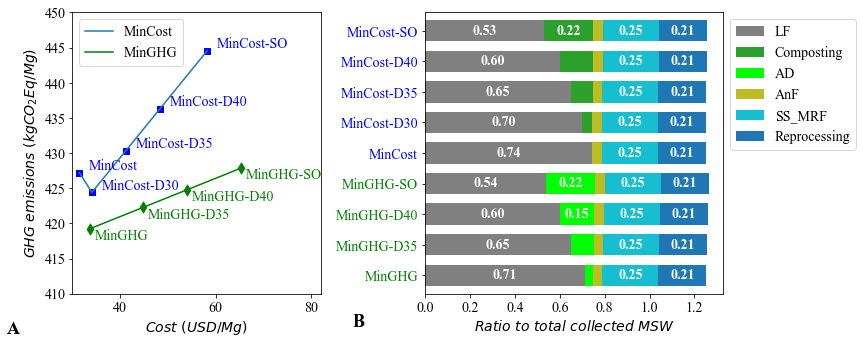

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1.2]}, sharex='col')
x = Result_DF.loc['Total cost', Result_DF.columns[:-1]]
y = Result_DF.loc['GWP', Result_DF.columns[:-1]]
ax1.scatter(x=x, y=y, marker='s', c='b')
ax1.plot(x, y, label='MinCost')
ax1.set_ylabel(r"$GHG\ emissions\ (kg CO_2 Eq/Mg)$")
ax1.set_xlabel(r"$Cost\ (USD/Mg)$")


label_dict = {
    'MinGHG-NoThermal': "MinGHG",
    'MinGHG-NoThermal-Div35': "MinGHG-D35",
    'MinGHG-NoThermal-Div40': "MinGHG-D40",
    'MinGHG-NoThermal-SO': "MinGHG-SO",
    'MinCost': "MinCost",
    'MinCost-Div30': "MinCost-D30",
    'MinCost-Div35': "MinCost-D35",
    'MinCost-Div40': "MinCost-D40",
    'MinCost-SO': "MinCost-SO"}

for l in x.index:
    ax1.text(x[l]+2, y[l], label_dict[l], ha='left', va='bottom', c='b')

MassFlows.T.plot.barh(stacked=True, ax=ax2, width=0.7, color=P_color_li)
ax2.set_xlabel(r"$Ratio\ to\ total\ collected\ MSW$")

def format_lable(values):
    lables = []
    for x in values:
        lables.append(('%0.2f' % x) if x > 0.15 else '')
    return lables

for c in ax2.containers:
    ax2.bar_label(c, label_type='center', labels=format_lable(c.datavalues), color='w',
                  font={'weight': 'bold', 'size': 14})
ax2.yaxis.set_ticklabels([label_dict[l] for l in MassFlows.T.index])

x_1=Result_DF_2.loc['Total cost', Result_DF_2.columns[:-1]]
y_1=Result_DF_2.loc['GWP', Result_DF_2.columns[:-1]]
ax1.scatter(x=x_1, y=y_1,
            marker='d', c='g', s=60)
ax1.plot(x_1, y_1, label='MinGHG', c='g')

for l in x_1.index:
    ax1.text(x_1[l]+1, y_1[l], label_dict[l], ha='left', va='top', color='g')

for t in ax2.yaxis.get_ticklabels():
    if 'Cost' in t.get_text():
        t.set_color('blue')
    else:
        t.set_color('green')

ax1.set_ylim(410, 450)
ax1.set_xlim(30, 82)
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', frameon=True)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=True)

fig.text(0, 0.05, 'A', weight='bold', fontsize=18)
fig.text(0.4, 0.07, 'B', weight='bold', fontsize=18)

fig.tight_layout()
fig.savefig('Opt_tradeoff.png', dpi=300)